# Lab 6 Statistical Inference

Welcome to Lab 6! In this lab, you can choose to work with your own dataset or use the dataset recommended. The goal for this lab is to estimate a population parameter by a confidence interval!

Let's start with importing all the Python modules. You may or may not need all of them, and feel free to add extra modules you want to use in the cell below.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#import seaborn as sns

## Read in your own data

Make sure your data file is saved in the same folder as this notebook, otherwise you will need to specify the file path to locate your data file. 

Throughout the notebook, I will link some Python documentations for useful functions and methods for easy access. 

Only perform the steps you see necessary. Feel free to add cells whenever you see fit.

* [pd.read_csv and others](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [2]:
final = pd.read_csv("final.csv")
final

,county,state,fips,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,...,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,Median AQI
0,Autauga,Alabama,1001.0,1015,21,0.053,0.074,0.134,0.295,0.444,...,0.388928,0.093737,0.107394,0.093737,0.107394,0.015823,0.014087,0.012368,0.012136,unknown
1,Baldwin,Alabama,1003.0,3101,22,0.083,0.059,0.098,0.323,0.436,...,0.449699,0.042494,0.045275,0.042494,0.045275,0.024839,0.022349,0.013524,0.013636,20.0
2,Barbour,Alabama,1005.0,598,5,0.067,0.121,0.120,0.201,0.491,...,0.232723,0.255651,0.226647,0.255651,0.226647,0.025480,0.019768,0.012517,0.008952,unknown
3,Bibb,Alabama,1007.0,363,2,0.020,0.034,0.096,0.278,0.572,...,0.376217,0.131330,0.081361,0.131330,0.081361,0.015317,0.012503,0.008886,0.008618,unknown
4,Blount,Alabama,1009.0,767,3,0.053,0.114,0.180,0.194,0.459,...,0.486874,0.008923,0.007989,0.008923,0.007989,0.051015,0.045516,0.010601,0.011033,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,0.061,0.295,0.230,0.146,0.268,...,0.454668,0.008195,0.005928,0.008195,0.005928,0.083863,0.076069,0.019177,0.018468,6.0
3074,Teton,Wyoming,56039.0,335,1,0.095,0.157,0.160,0.247,0.340,...,0.456785,0.004304,0.003026,0.004304,0.003026,0.080293,0.071173,0.014107,0.011976,41.0
3075,Uinta,Wyoming,56041.0,254,1,0.098,0.278,0.154,0.207,0.264,...,0.470879,0.003807,0.003708,0.003807,0.003708,0.045832,0.046673,0.017601,0.016859,5.0
3076,Washakie,Wyoming,56043.0,47,5,0.204,0.155,0.069,0.285,0.287,...,0.463549,0.003203,0.002434,0.003203,0.002434,0.072389,0.069571,0.019731,0.021268,unknown


Great, your data is now a pd.df! Think about the following questions:
* Is your data a census or a sample?
    * What is the population of interest here?
* If your data is a sample, is it a random sample?
    * I doubt it really is but let's not worry about that for now!

Make a random sample of your data if your data is a census.
* [df.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
* You can decide what will be a reasonable sample size for now. 
* Once you pick a sample size, you need to stick with it. 

In [3]:
sample_size = 30
my_sample = final.sample(n=sample_size)
my_sample

,county,state,fips,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,...,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,Median AQI
2128,Okfuskee,Oklahoma,40107.0,53,0,0.112,0.035,0.241,0.193,0.419,...,0.288585,0.047278,0.024514,0.047278,0.024514,0.022096,0.018177,0.149671,0.140248,unknown
1233,Jackson,Michigan,26075.0,2392,55,0.110,0.080,0.133,0.166,0.511,...,0.435487,0.049398,0.032074,0.049398,0.032074,0.019336,0.017097,0.016870,0.016453,unknown
2919,Snohomish,Washington,53061.0,5741,197,0.017,0.014,0.056,0.191,0.721,...,0.382157,0.021295,0.016751,0.021295,0.016751,0.055127,0.050905,0.036437,0.035391,30.0
378,Carroll,Georgia,13045.0,1687,46,0.089,0.133,0.154,0.168,0.457,...,0.388218,0.091831,0.104932,0.091831,0.104932,0.038553,0.033361,0.014501,0.014368,unknown
2661,Rusk,Texas,48401.0,323,2,0.038,0.040,0.101,0.331,0.491,...,0.371485,0.101110,0.073889,0.101110,0.073889,0.099805,0.075249,0.015458,0.013840,3.0
147,Sevier,Arkansas,5133.0,929,10,0.120,0.093,0.155,0.165,0.467,...,0.438114,0.021285,0.020697,0.021285,0.020697,0.179926,0.162815,0.037161,0.037220,unknown
267,Rio Grande,Colorado,8105.0,87,2,0.061,0.144,0.110,0.242,0.444,...,0.461791,0.006213,0.004438,0.006213,0.004438,0.222508,0.221266,0.032928,0.030177,unknown
1791,Essex,New York,36031.0,63,0,0.050,0.050,0.057,0.107,0.736,...,0.467372,0.024671,0.003009,0.024671,0.003009,0.022285,0.007862,0.011224,0.008459,40.0
2163,Grant,Oregon,41023.0,2,0,0.014,0.062,0.132,0.120,0.671,...,0.468676,0.001667,0.001111,0.001667,0.001111,0.019169,0.020142,0.023892,0.023337,unknown
586,Effingham,Illinois,17049.0,83,1,0.072,0.072,0.214,0.232,0.410,...,0.488973,0.003587,0.002646,0.003587,0.002646,0.011938,0.011056,0.005705,0.005881,unknown


## Ues recommended data

Bay Area Bike Share(Now [Bay Wheels](https://www.lyft.com/bikes/bay-wheels)) is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with short trips under certain minutes in length having no additional charge; longer trips will incur overtime fees.

The following trip data showing information about each trip taken during one year (9/2014 - 8/2015). 

Run the following cell to read in the data. 

In [5]:
url='https://raw.githubusercontent.com/cgradwohl/BABS/master/dandp0-bikeshareanalysis/201508_trip_data.csv'
trips = pd.read_csv(url)
trips

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
354148,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


We will assume this `trips` data is our census. For the sake of time, we will skip the data cleaning and exploration part. If you are interested in this data set, find out more about:
* [Kaggle challenge for SF Bay Area Bike Share](https://www.kaggle.com/benhamner/sf-bay-area-bike-share)

Let's make a random sample instead of working with the census. 
* [df.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
* You can decide what will be a reasonable sample size for now. 
* Once you pick a sample size, you need to stick with it. 

In [13]:
sample_size = ...
trips_sample = ...

## From now on, no matter you are working with your own data, or the recommended data, let's pretend we only have access to a random sample.

* For your own data, the random sample will be
    * the entire data set if it is a random sample
    * a random sample you made from your data if your data is a census
* For the `trips` data, the random sample will be
    * `trips_sample`

## The goal for this lab is to estimate a population parameter with a 90% confidence interval!

* For your own data, you will have to decide a population parameter you would like to estimate.
    * Why do you want to estimate this? 
    * Does this help anwser your data questions for the project?
    * Are there more than one parameters you want to estimate?
* For the `trips` data, we are insterested in estimating the 80 percentile of the trip durations (in seconds). Here's why:
    * Once users pay subscription or single pass fee, they can take as many trips as they want as long as the trips are short (no additional charge).
    * For the trips that are long (defined to be the top 20%), we will charge additional fee by minute.
    * This is important so people don't keep the bikes forever and return them on time. 
    * Therefore we want to estimate what should be the duration limit to define the "short" trips, i.e. the 80 percentile of duration of all the trips!

## Pick a statistic to approximate the population parameter you are trying to estimate:
* For your own data, this is different based on what parameter you chose.
* For `trips` data, what would be a statistic to approximate that parameter?

## Figure out code to generate that statistic once, based on your random sample:

* For the `trips` data, you may finde [np.percentile](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) useful.

In [7]:
orig_sample_stat = np.mean(my_sample['cases'])
orig_sample_stat

690.6666666666666

## Great, now you have one estimate!
* How good do you think your estimate is?
* To anwser that question, we need to be able to quantify the uncentainty.
    * Why is there uncentainty? -- different random samples result in different statistics
    * How do we quantify the uncentainty? -- sampling distribution
    * How do we estimate the sampling distribution?
        * Repeatedly take random samples from the population
        * One sample --> one value of your statistic
        * Many samples --> the empirical distribution of your statistic 
    * What if we can't get another sample from the population?
        * Bootstrap!

## Generate many estimates using Bootstrap resamples:

In [ ]:
# Here are some sample code
bootstrap_stats = []
sample_size = original_sample.shape[0]
rep = # number of repetition (number of bootstrap samples)

for i in np.arange(rep):
    bootstrap_sample = original_sample.sample(n, replace=True)
    new_bootstrap_stats = # code you generate that statistic once
    bootstrap_stats = np.append(bootstrap_stats, new_bootstrap_stats)

In [8]:
# Here are some sample code
bootstrap_stats = []
sample_size = my_sample.shape[0]
rep = 1000

for i in np.arange(rep):
    bootstrap_sample = my_sample.sample(sample_size, replace=True)
    new_bootstrap_stats = np.mean(bootstrap_sample['cases'])
    bootstrap_stats = np.append(bootstrap_stats, new_bootstrap_stats)
bootstrap_stats

array([ 453.2       ,  943.86666667,  601.66666667, 1049.66666667,
        583.9       ,  432.2       ,  564.16666667,  757.53333333,
        694.23333333,  806.23333333, 1020.03333333,  700.43333333,
        438.06666667,  428.73333333, 1109.13333333,  377.43333333,
        690.3       ,  644.4       ,  997.13333333,  645.3       ,
        544.33333333,  711.83333333,  577.53333333,  409.16666667,
        874.86666667,  640.86666667, 1088.26666667,  702.03333333,
        583.8       ,  454.16666667,  539.1       ,  637.23333333,
        848.56666667,  544.        , 1295.46666667,  810.63333333,
        352.7       ,  576.8       ,  542.56666667, 1022.96666667,
        667.6       ,  684.86666667,  837.33333333,  778.3       ,
        826.43333333,  696.43333333,  454.8       ,  581.8       ,
        495.3       ,  585.66666667,  744.5       ,  757.53333333,
        616.83333333,  979.8       ,  659.8       ,  677.33333333,
        909.23333333,  720.93333333,  633.6       , 1060.26666

Print out your `bootstrap_stats` to take a look!

Visualize in a histogram:

(array([  1.,   8.,  52., 134., 171., 191., 167., 111.,  90.,  41.,  19.,
         10.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]),
 array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
        1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
        2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
        3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
        4500, 4600, 4700, 4800, 4900]),
 <a list of 48 Patch objects>)

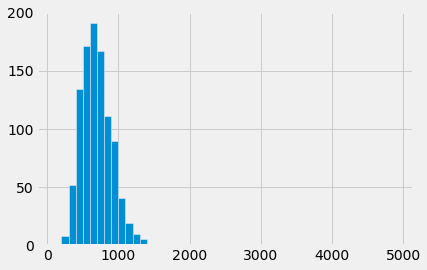

In [9]:
my_bins = np.arange(100, 5000, 100)
plots.hist(bootstrap_stats, bins=my_bins)

## Calculate the 90% CI:

How do we do this?
* Remember the X% CI is the middle X% "chunck" of the histogram you just made.
* We can use percentile to figure out the left and right end of your CI.

In [11]:
left = np.percentile(bootstrap_stats, 5)
left

381.12666666666667

In [13]:
right = np.percentile(bootstrap_stats, 95)
right

1054.2816666666663

* How do we interpret this 90% CI?
* How does the confidence level related to the width of the CI?

Let's visualize the `bootstrap_stats`, the CI and the statistics you calculated from the original sample all together in one plot. How do they compare?

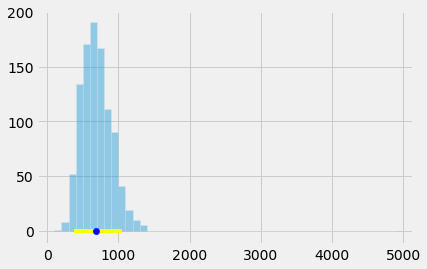

In [14]:
plots.hist(bootstrap_stats, bins=my_bins, alpha=0.4)

plots.plot([left, right], [0, 0], color='yellow', lw=4, zorder=1)
plots.scatter(orig_sample_stat, 0, color="blue", s=40, zorder=2);

## For more practice:
* come up with another parameter to estimate. 
* choose a differnt sample size.
* use another dataset.

You're finished with lab 6! Notice this is a group assignment so you only need to submit one copy for the entire team. Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file** to be lab06_Team_Name,
* **Upload** your notebook and any data file(s) to the course website.